In [42]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.models import Sequential
from scipy import ndimage
from keras.layers import Reshape
from keras.layers import Conv2D

In [59]:
print("###################Task 1###################")
print("Part a")
(x_train_01, y_train_01), (x_test_01, y_test_01) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

# Scale the data
x_train_01 = tf.keras.utils.normalize(x_train_01, axis=1)
x_test_01 = tf.keras.utils.normalize(x_test_01, axis=1)

###################Task 1###################
Part a


In [60]:
print("Part b")
# Select random images from training set
img1 = x_train_01[2]
img2 = x_train_01[20]
img3 = x_train_01[200]
img4 = x_train_01[2000]
img5 = x_train_01[2000]

Part b


In [61]:
# Creating weigths
w1 = ([[-1, -1, -1],[2, 2, 2], [-1, -1, -1]])
w2 = ([[-1, 2, -1],[-1, 2, -1], [-1, 2, -1]])
w3 = ([[-1, -1, 2],[-1, 2, -1], [2, -1, -1]])

In [62]:
# Applying Weigths for image 1
wimg1_1 = ndimage.convolve(img1, w1)
wimg1_2 = ndimage.convolve(img1, w2)
wimg1_3 = ndimage.convolve(img1, w3)

# Weigths for image 2
wimg2_1 = ndimage.convolve(img2, w1)
wimg2_2 = ndimage.convolve(img2, w2)
wimg2_3 = ndimage.convolve(img2, w3)

# Weigths for image 3
wimg3_1 = ndimage.convolve(img3, w1)
wimg3_2 = ndimage.convolve(img3, w2)
wimg3_3 = ndimage.convolve(img3, w3)

# Weigths for image 4
wimg4_1 = ndimage.convolve(img4, w1)
wimg4_2 = ndimage.convolve(img4, w2)
wimg4_3 = ndimage.convolve(img4, w3)

# Weigths for image 5
wimg5_1 = ndimage.convolve(img5, w1)
wimg5_2 = ndimage.convolve(img5, w2)
wimg5_3 = ndimage.convolve(img5, w3)

Part c


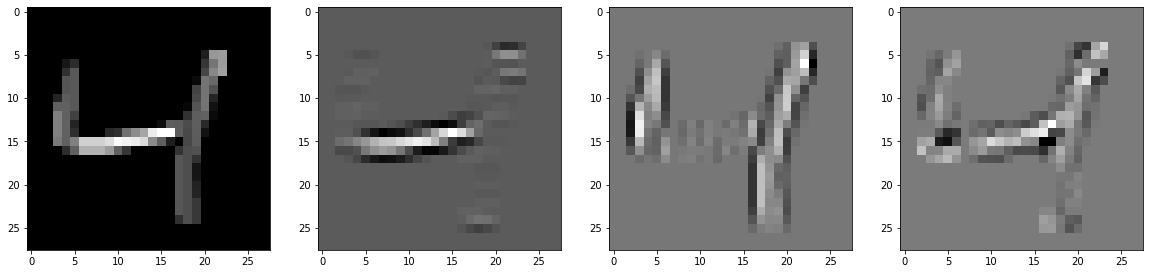

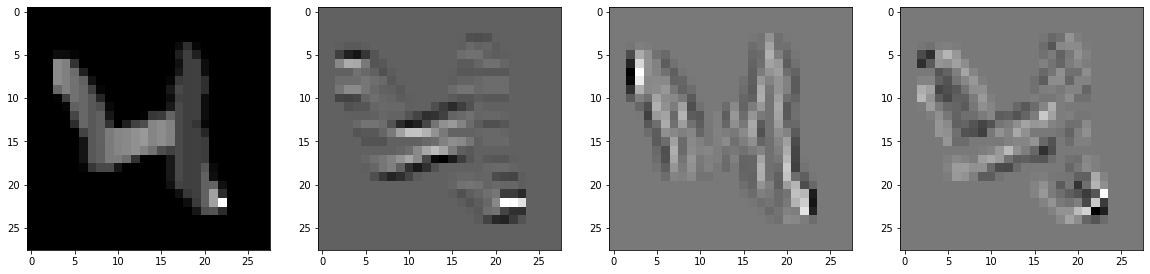

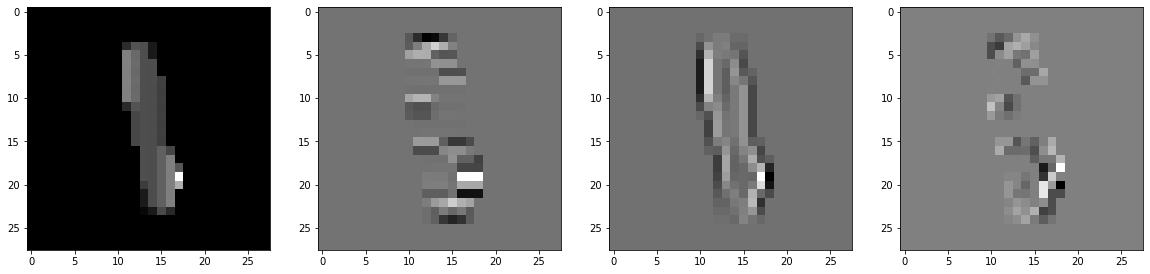

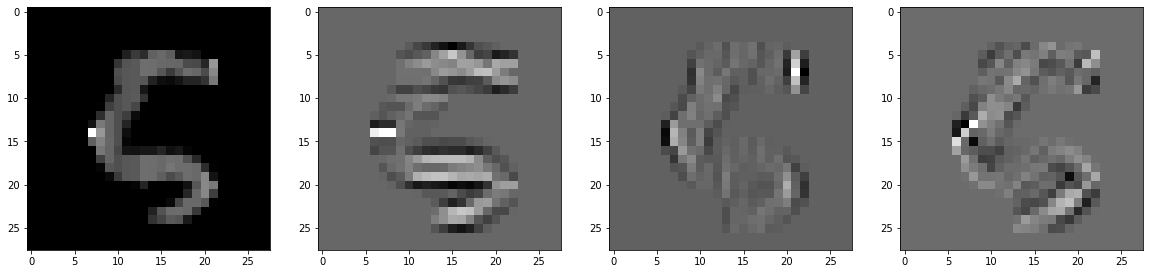

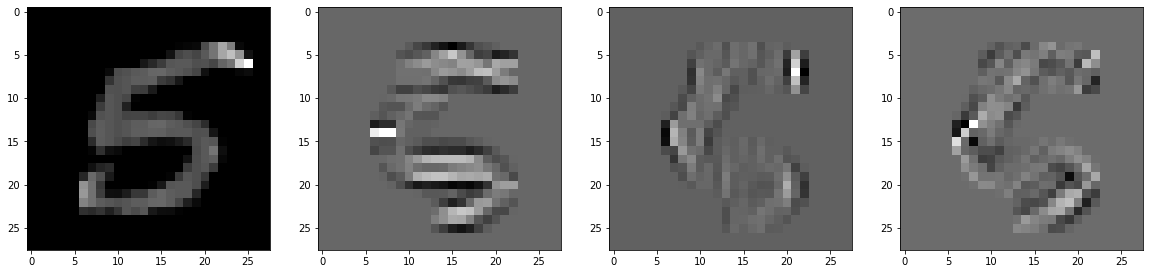

In [63]:
print("Part c")
# Plot
image1 = x_train_01[2]# plot the sample
f, ax = plt.subplots(1, 4, figsize=(20, 20))
a1 = [image1, wimg1_1, wimg1_2, wimg1_3]
for i in range(0, 4):
    sample = a1[i]
    ax[i].imshow(sample, cmap='gray')
plt.show()

image2 = x_train_01[20]# plot the sample
f2, ax2 = plt.subplots(1, 4, figsize=(20, 20))
a2 = [image2, wimg2_1, wimg2_2, wimg2_3]
for i in range(0, 4):
    sample = a2[i]
    ax2[i].imshow(sample, cmap='gray')
plt.show()

image3 = x_train_01[200]# plot the sample
f3, ax3 = plt.subplots(1, 4, figsize=(20, 20))
a3 = [image3, wimg3_1, wimg3_2, wimg3_3]
for i in range(0, 4):
    sample = a3[i]
    ax3[i].imshow(sample, cmap='gray')
plt.show()

image4 = x_train_01[2000]# plot the sample
f4, ax4 = plt.subplots(1, 4, figsize=(20, 20))
a4 = [image4, wimg4_1, wimg4_2, wimg4_3]
for i in range(0, 4):
    sample = a4[i]
    ax4[i].imshow(sample, cmap='gray')
plt.show()

image5 = x_train_01[20000]# plot the sample
f5, ax5 = plt.subplots(1, 4, figsize=(20, 20))
a5 = [image5, wimg5_1, wimg5_2, wimg5_3]
for i in range(0, 4):
    sample = a5[i]
    ax5[i].imshow(sample, cmap='gray')
plt.show()

# The convolutions are highlighting the different gray scales

In [70]:
print("###################Task 2###################")

print("Part a")
(x_train_02, y_train_02), (x_test_02, y_test_02) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

# Scale the data
x_train_02 = x_train_02 / 255
x_test_02 = x_test_02 / 255

###################Task 2###################
Part a


In [78]:
# Create neural network with given layers
print("Part b")
model2b = Sequential([
    Reshape((28,28,1)),
    Conv2D(128, kernel_size=(3,3)),
    Conv2D(64, kernel_size=(3,3)),
    Flatten(),
    Dense(64),
    Dense(10, activation='softmax')
])

# Compile the nn
model2b.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Fit the nn
model2b.fit(x_train_02, y_train_02, epochs=5)

# Evaluate the nn on the training set
val_loss_2b, val_acc_2b = model2b.evaluate(x_train_02, y_train_02)
print("Accuracy for test set:", val_acc_2b)

# Print summary
model2b.summary()

Part b
Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3620 - accuracy: 0.8970

In [ ]:
from keras.layers import MaxPooling2D

print("Part c")
model2c = Sequential([
    Reshape((28,28,1)),
    Conv2D(128, kernel_size=(3,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64),
    Dense(10, activation='softmax')
])

# Compile the nn
model2c.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Fit the nn
model2c.fit(x_train_02, y_train_02, epochs=5)

# Evaluate the nn on the training set
val_loss_2c, val_acc_2c = model2c.evaluate(x_test_02, y_test_02)
print("Accuracy for test set:", val_acc_2c)

# Print summary
model2c.summary()